In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [82]:
# Load the dataset
IBM_df = pd.read_csv("/Users/deepakraj/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display first few rows of the dataset
IBM_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [83]:
# Display basic information of the dataset
IBM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [84]:
# Drop rows with missing values
IBM_df.dropna(inplace=True)

In [85]:
# Convert categorical variables to numeric
IBM_df = pd.get_dummies(IBM_df, drop_first=True)

In [86]:
# Define target and features
y = IBM_df['Attrition_Yes']
x = IBM_df.drop('Attrition_Yes', axis=1)

In [87]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [89]:
# Make predictions
y_pred = rf_model.predict(x_test)

In [90]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusionmatrix)
print("Classification Report:\n", report)

Random Forest Accuracy: 0.8401
Confusion Matrix:
 [[244   3]
 [ 44   3]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.99      0.91       247
        True       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294



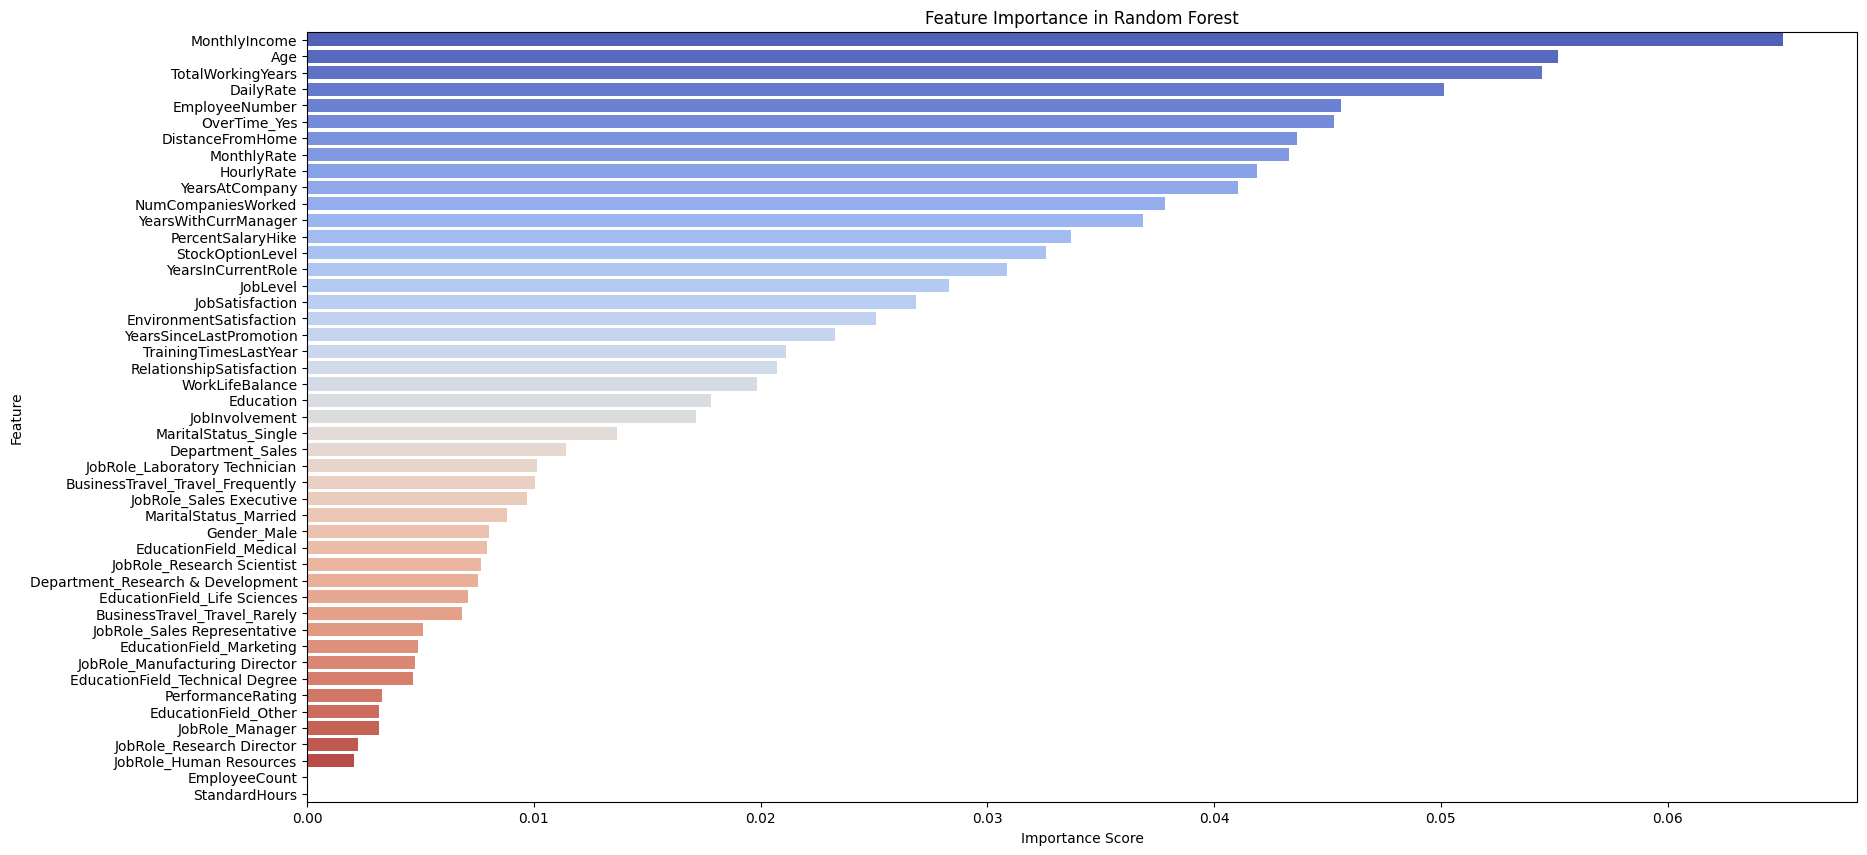

In [91]:
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette="coolwarm", legend=False)
"""
It creates a bar plot of feature importance from Random Forest Model.
"""
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

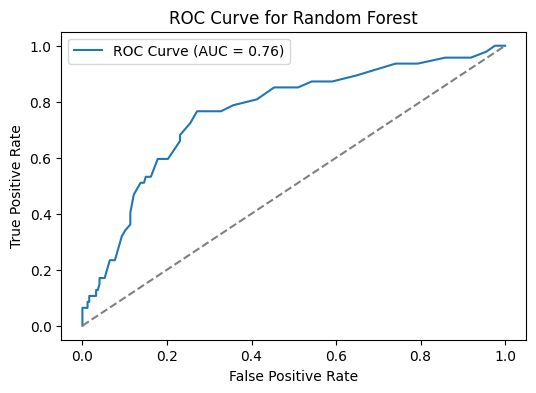

In [92]:
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
"""
It plot the ROC curve for Random Forest Model and it displays the AUC score.
"""
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

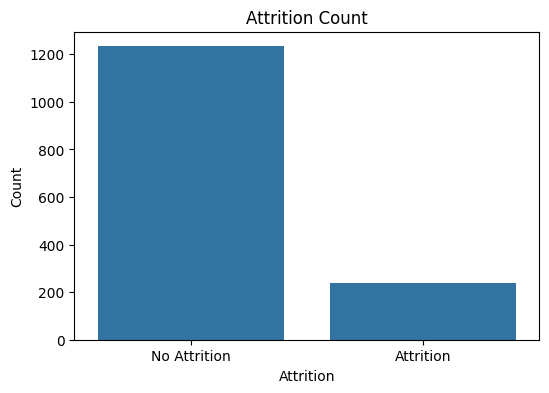

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
"""
It creates a count plot to visualize the distribution of attrition categories.
"""
plt.title("Attrition Count")
plt.xticks([0, 1], ["No Attrition", "Attrition"])
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

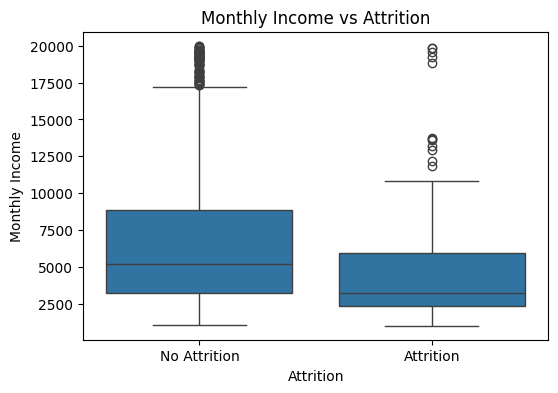

In [94]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=IBM_df["MonthlyIncome"])
"""
It creates a box plot to visualize the relationship between monthly income vs attrition.
"""
plt.title("Monthly Income vs Attrition")
plt.xticks([0, 1], ["No Attrition", "Attrition"])
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()